In [ ]:
# Import The Relevant Libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Phase 1 Project Description
##Project Overview
For this project, you will use exploratory data analysis to generate insights for a business stakeholder.

##Business Problem
Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

##The Data
(data/bom.movie_gross.csv) 
(data/rt.movie_info.tsv)
(data/rt.reviews.tsv) 
(data/tmdb.movies.csv)
(data/tn.movie_budgets.csv)

I opted to use (data/bom.movie_gross.csv),   and (data/tn.movie_budgets.csv)
Because it was collected from various locations, the different files have different formats. Some are compressed CSV (comma-separated values) or TSV (tab-separated values) files that can be opened using spreadsheet software or pd.read_csv, while the data from IMDB is located in a SQLite database.

In [2]:
# Load the datasets ('bom.movie_gross.csv')
bom_movie_gross_df= pd.read_csv('data/bom.movie_gross.csv')
#Display the first few rows of the DataFrame to understand its structure
bom_movie_gross_df.head()


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [3]:
# Load the datasets ('tn.movie_budgets')
tn_movie_budgets_df = pd.read_csv('data/tn.movie_budgets.csv')
#Display the first few rows of the DataFrame to understand its structure
tn_movie_budgets_df.head()


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


#Step 2: Clean the Data

In [4]:
#We will clean the column names for consistency and convert appropriate columns to numeric types.
# Clean column names for consistency
bom_movie_gross_df.columns = [col.lower().replace(' ', '_') for col in bom_movie_gross_df.columns]
tn_movie_budgets_df.columns = [col.lower().replace(' ', '_') for col in tn_movie_budgets_df.columns]

In [5]:

bom_movie_gross_df['domestic_gross'] = pd.to_numeric(bom_movie_gross_df['domestic_gross'], errors='coerce')
bom_movie_gross_df['foreign_gross'] = pd.to_numeric(bom_movie_gross_df['foreign_gross'], errors='coerce')


In [6]:
# Convert columns to numeric types
tn_movie_budgets_df['production_budget'] = tn_movie_budgets_df['production_budget'].replace('[\$,]', '', regex=True).astype(float)
tn_movie_budgets_df['domestic_gross'] = tn_movie_budgets_df['domestic_gross'].replace('[\$,]', '', regex=True).astype(float)
tn_movie_budgets_df['worldwide_gross'] = tn_movie_budgets_df['worldwide_gross'].replace('[\$,]', '', regex=True).astype(float)


In [7]:
# Display the first few rows to verify changes
print("Cleaned bom.movie_gross.csv:")
bom_movie_gross_df.head()

Cleaned bom.movie_gross.csv:


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010


In [8]:
# Display the first few rows to verify changes
print("Cleaned tn.movie_budgets.csv:")
tn_movie_budgets_df.head()


Cleaned tn.movie_budgets.csv:


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09


#Step 3: Merge the DataFrames We'll merge the two DataFrames on the movie title.


In [9]:
# Merge the DataFrames on the movie title
merged_df = pd.merge(bom_movie_gross_df, tn_movie_budgets_df, left_on='title', right_on='movie', how='inner')

# Display the first few rows of the merged DataFrame to verify
merged_df.head()

,title,studio,domestic_gross_x,foreign_gross,year,id,release_date,movie,production_budget,domestic_gross_y,worldwide_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,47,"Jun 18, 2010",Toy Story 3,200000000.0,415004880.0,1.068880e+09
1,Inception,WB,292600000.0,535700000.0,2010,38,"Jul 16, 2010",Inception,160000000.0,292576195.0,8.355246e+08
2,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,27,"May 21, 2010",Shrek Forever After,165000000.0,238736787.0,7.562447e+08
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000.0,2010,53,"Jun 30, 2010",The Twilight Saga: Eclipse,68000000.0,300531751.0,7.061028e+08
4,Iron Man 2,Par.,312400000.0,311500000.0,2010,15,"May 7, 2010",Iron Man 2,170000000.0,312433331.0,6.211564e+08


#Step 4: Analyze the Data


In [10]:
#We will calculate key metrics such as profitability and ROI, and then later create visualizations to highlight key insights.
# Calculate additional metrics: Profitability and return on investment (ROI)
merged_df['profitability'] = merged_df['worldwide_gross'] - merged_df['production_budget']
merged_df['roi'] = (merged_df['profitability'] / merged_df['production_budget']) * 100

# Display the first few rows to verify the new columns
merged_df[['title', 'production_budget', 'worldwide_gross', 'profitability', 'roi']].head()

,title,production_budget,worldwide_gross,profitability,roi
0,Toy Story 3,200000000.0,1.068880e+09,868879522.0,434.439761
1,Inception,160000000.0,8.355246e+08,675524642.0,422.202901
2,Shrek Forever After,165000000.0,7.562447e+08,591244673.0,358.330105
3,The Twilight Saga: Eclipse,68000000.0,7.061028e+08,638102828.0,938.386512
4,Iron Man 2,170000000.0,6.211564e+08,451156389.0,265.386111


#Visualization

In [12]:
# Import visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt


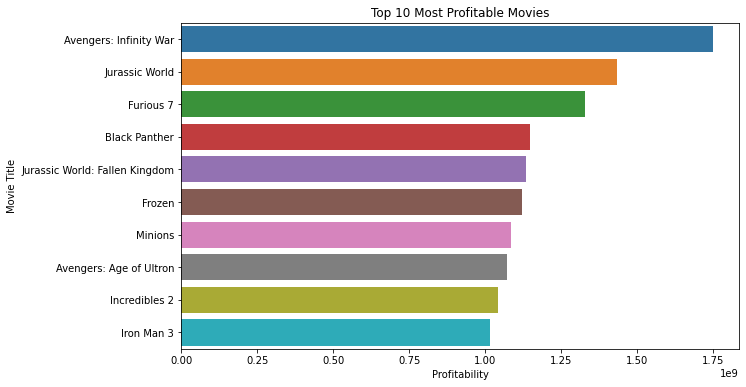

In [13]:
# Plot profitability of top 10 movies
top_10_profitable = merged_df.sort_values(by='profitability', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_profitable, x='profitability', y='title')
plt.title('Top 10 Most Profitable Movies')
plt.xlabel('Profitability')
plt.ylabel('Movie Title')
plt.show()

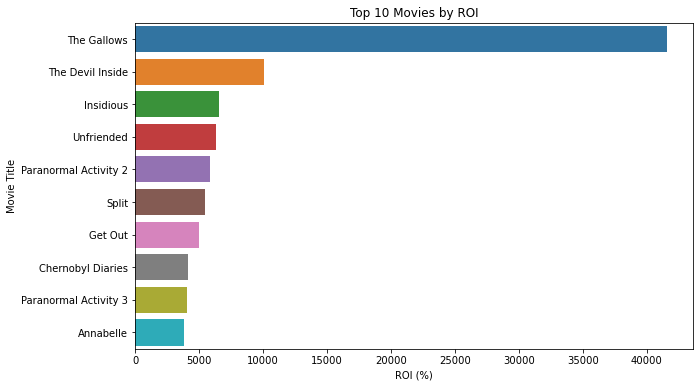

In [14]:
# Plot ROI of top 10 movies
top_10_roi = merged_df.sort_values(by='roi', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_roi, x='roi', y='title')
plt.title('Top 10 Movies by ROI')
plt.xlabel('ROI (%)')
plt.ylabel('Movie Title')
plt.show()